In [38]:
# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', as_frame=False)

# Extract image data
images = mnist.data.astype(np.uint8)  # Convert to unsigned integer type

# Parameters for LBP
radius = 3
n_points = 8 * radius

def extract_lbp_features(images):
    lbp_features = []
    for image in images:
        lbp = local_binary_pattern(image.reshape(28, 28), n_points, radius, method='uniform')
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        lbp_features.append(hist)
    return np.array(lbp_features)

# Extract LBP features
features = extract_lbp_features(images)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, mnist.target, test_size=0.2, random_state=42)

# Initialize the classifier - SVM or Random Forest
# classifier = SVC(gamma='scale')
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)


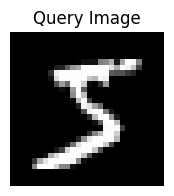

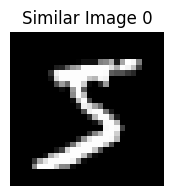

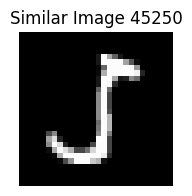

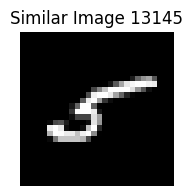

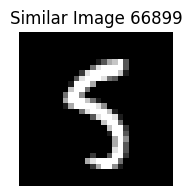

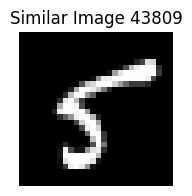

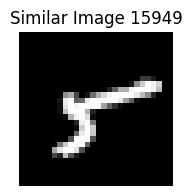

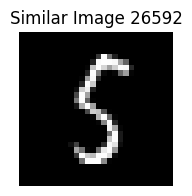

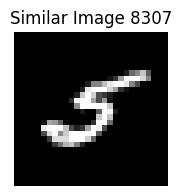

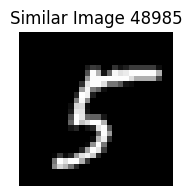

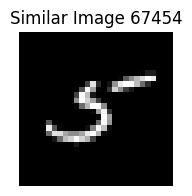

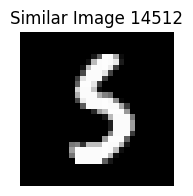

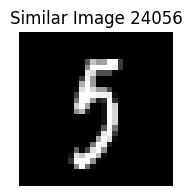

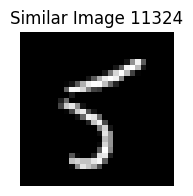

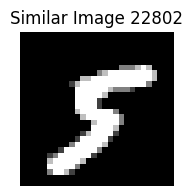

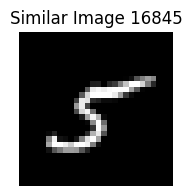

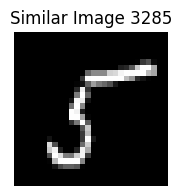

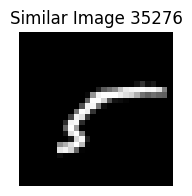

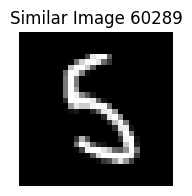

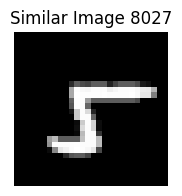

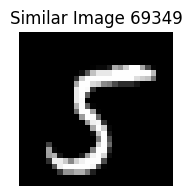

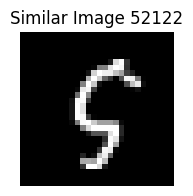

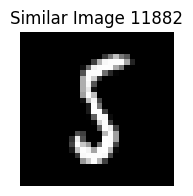

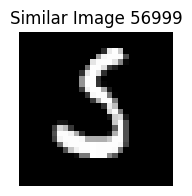

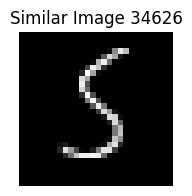

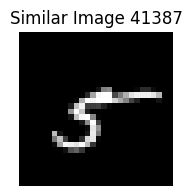

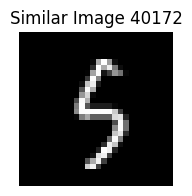

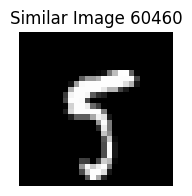

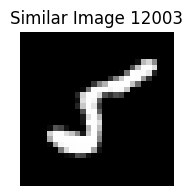

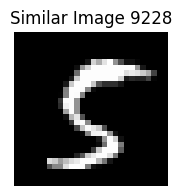

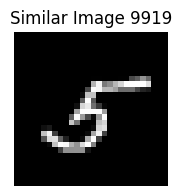

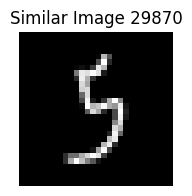

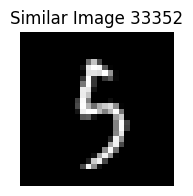

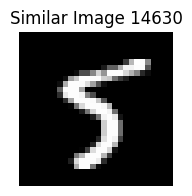

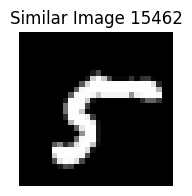

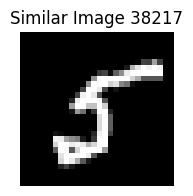

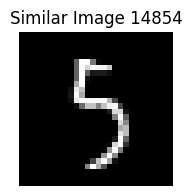

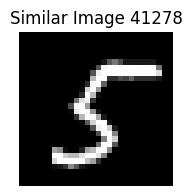

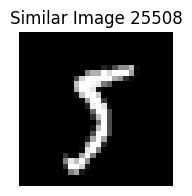

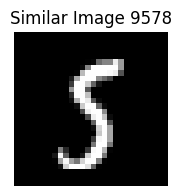

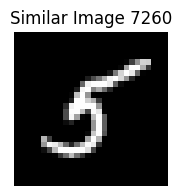

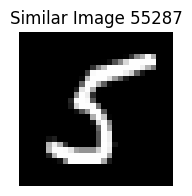

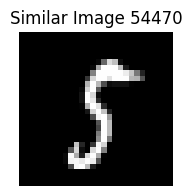

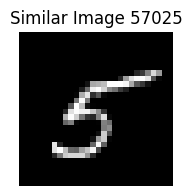

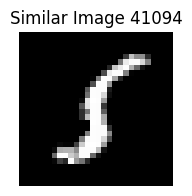

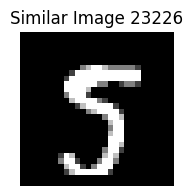

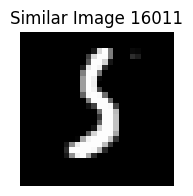

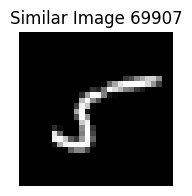

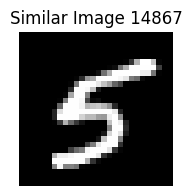

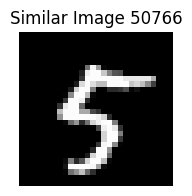

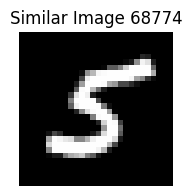

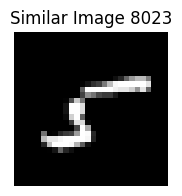

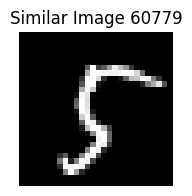

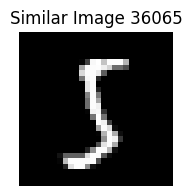

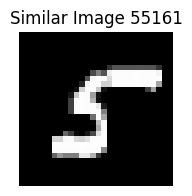

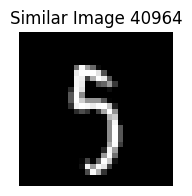

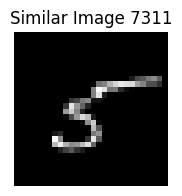

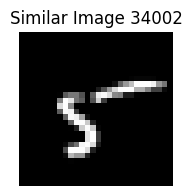

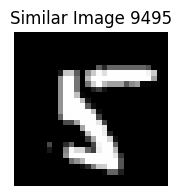

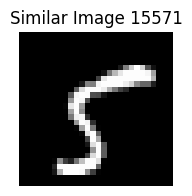

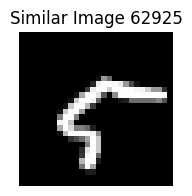

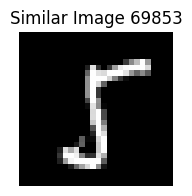

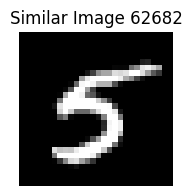

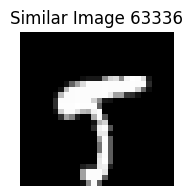

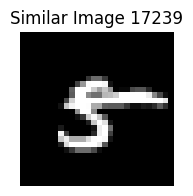

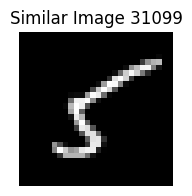

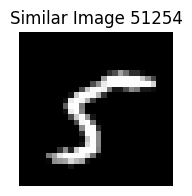

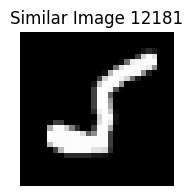

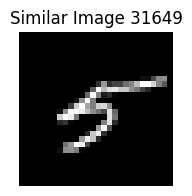

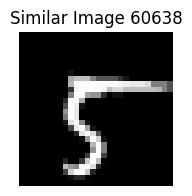

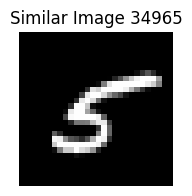

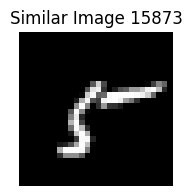

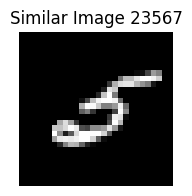

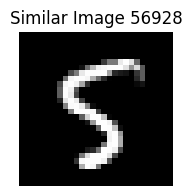

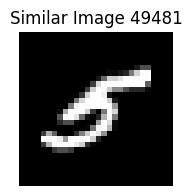

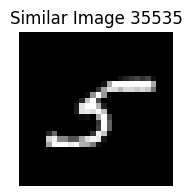

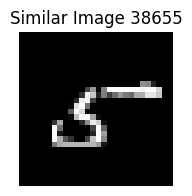

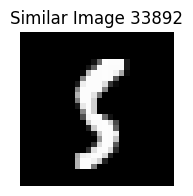

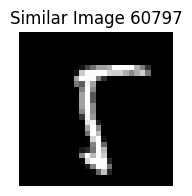

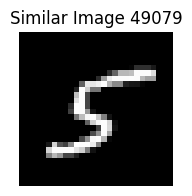

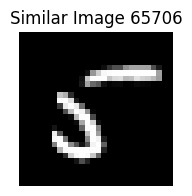

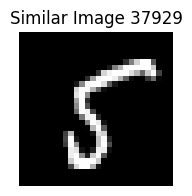

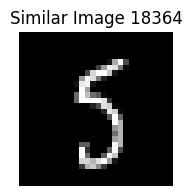

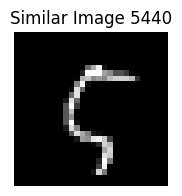

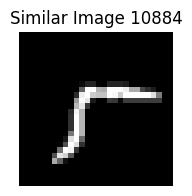

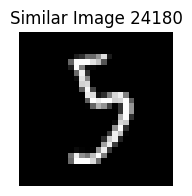

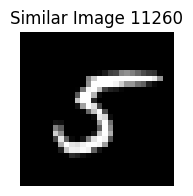

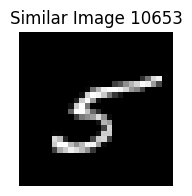

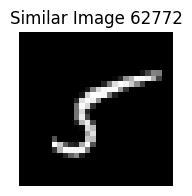

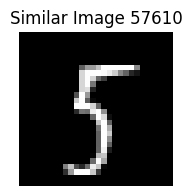

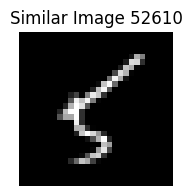

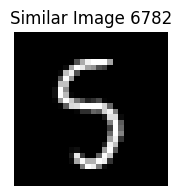

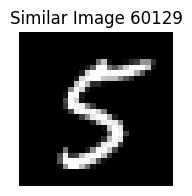

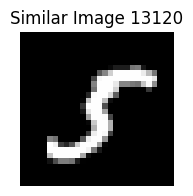

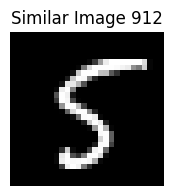

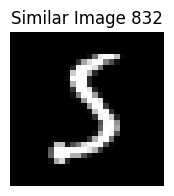

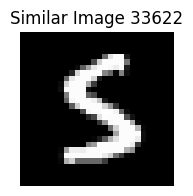

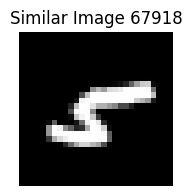

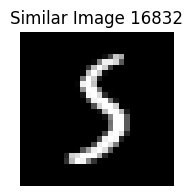

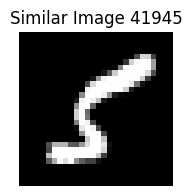

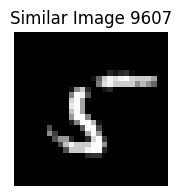

In [9]:
# Content-Based Image Retrieval (CBIR)
def retrieve_similar_images(query_image, image_dataset, trained_model, top_k=100):
    query_feature = extract_lbp_features(np.array([query_image]))
    predictions = trained_model.predict_proba(image_dataset)
    query_pred = trained_model.predict_proba(query_feature)
    
    # Calculate similarity (Euclidean distance)
    distances = np.linalg.norm(predictions - query_pred, axis=1)
    sorted_indices = np.argsort(distances)
    
    # Retrieve top k similar images
    return sorted_indices[:top_k]

# Example usage of CBIR
query_image = mnist.data[0]  # This should be the image you want to retrieve similar images for
similar_images_indices = retrieve_similar_images(query_image, features, classifier)

# Show query image
plt.figure(figsize=(2, 2))
plt.imshow(query_image.reshape(28, 28), cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

# Show similar images
for index in similar_images_indices:
    similar_image = mnist.data[index]
    plt.figure(figsize=(2, 2))
    plt.imshow(similar_image.reshape(28, 28), cmap='gray')
    plt.title(f'Similar Image {index}')
    plt.axis('off')
    plt.show()

Accuracy: 60.63%
Precision: 59.08%
Recall: 59.81%
F1-score: 59.15%


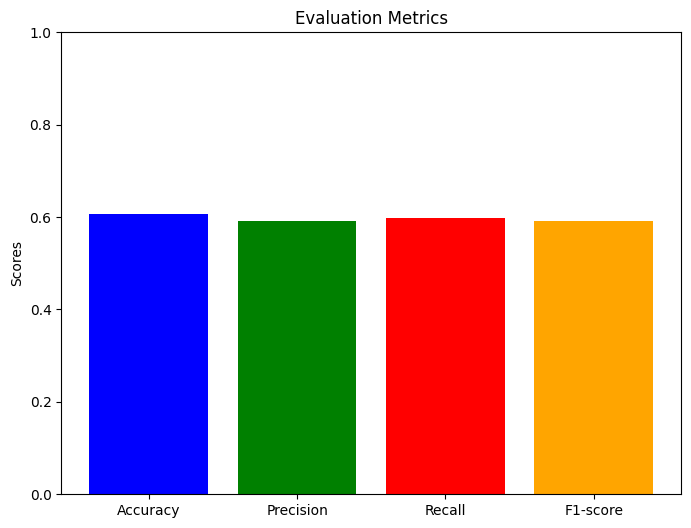

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-score: {f1*100:.2f}%")

# Define metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)  # Setting y-axis limits to [0, 1] for better visualization of scores
plt.show()

In [29]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your true labels and predicted labels respectively
y_pred = classifier.predict(X_test)

precision, recall, f1, accuracy = precision_recall_fscore_support(y_test, y_pred)

# Print results for each class
for i in range(len(precision)):
    print(f"Class {i}:")
    print(f"  Precision: {precision[i]*100:.2f}%")
    print(f"  Recall: {recall[i]*100:.2f}%")
    print(f"  F1-score: {f1[i]*100:.2f}%")
    print(f"  Support: {support[i]}")
    print()


Class 0:
  Precision: 81.59%
  Recall: 83.84%
  F1-score: 82.70%
  Support: 1343

Class 1:
  Precision: 96.53%
  Recall: 97.25%
  F1-score: 96.89%
  Support: 1600

Class 2:
  Precision: 40.76%
  Recall: 34.86%
  F1-score: 37.58%
  Support: 1380

Class 3:
  Precision: 49.22%
  Recall: 57.50%
  F1-score: 53.04%
  Support: 1433

Class 4:
  Precision: 50.41%
  Recall: 61.16%
  F1-score: 55.27%
  Support: 1295

Class 5:
  Precision: 36.92%
  Recall: 24.27%
  F1-score: 29.29%
  Support: 1273

Class 6:
  Precision: 55.99%
  Recall: 47.21%
  F1-score: 51.22%
  Support: 1396

Class 7:
  Precision: 65.21%
  Recall: 70.73%
  F1-score: 67.86%
  Support: 1503

Class 8:
  Precision: 64.94%
  Recall: 70.30%
  F1-score: 67.52%
  Support: 1357

Class 9:
  Precision: 49.25%
  Recall: 50.99%
  F1-score: 50.10%
  Support: 1420



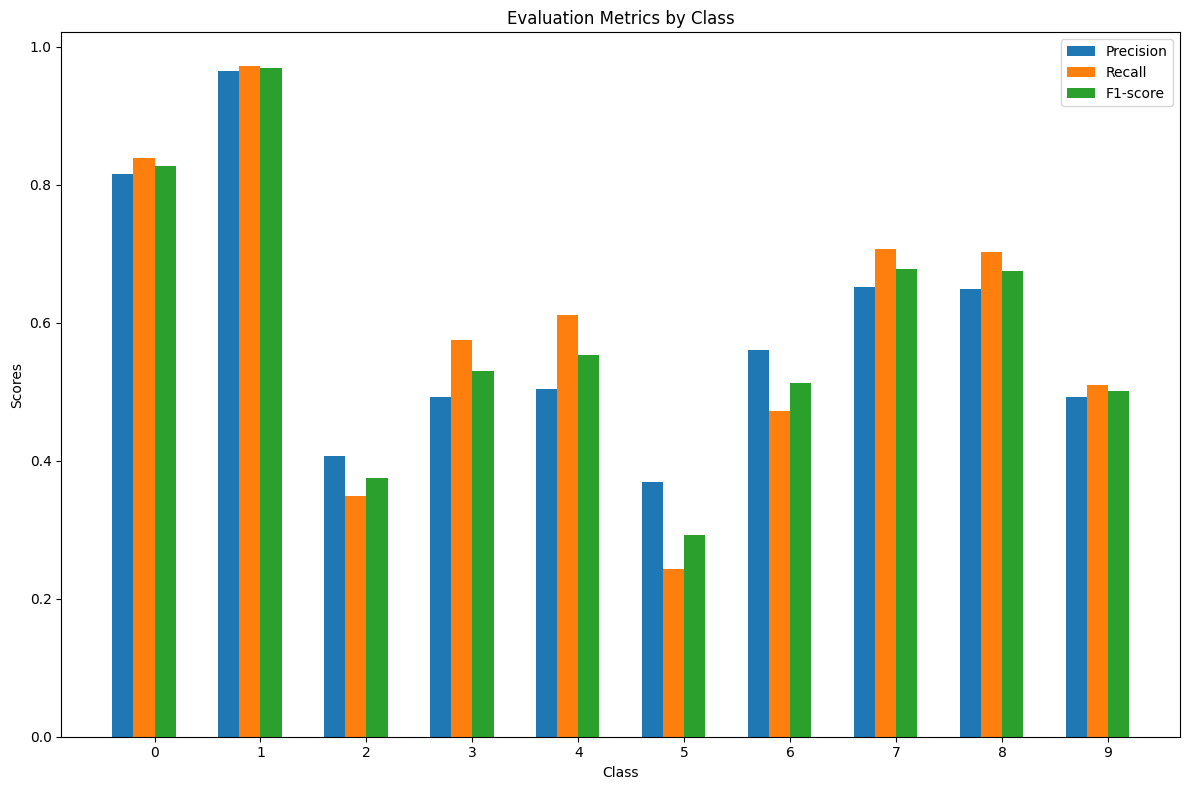

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your true labels and predicted labels respectively
y_pred = classifier.predict(X_test)

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# Define classes (0 to 9 for MNIST)
classes = np.arange(len(precision))

# Plot
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(classes))

plt.bar(index, precision, bar_width, label='Precision')
plt.bar(index + bar_width, recall, bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1, bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Class')
plt.xticks(index + 1.5 * bar_width, classes)
plt.legend()
plt.tight_layout()
plt.show()
